In [ ]:
try:
  import rtree
except ModuleNotFoundError as e:
  !apt-get install libspatialindex-dev
  !pip install rtree
  import rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (747 kB/s)
Selecting previously unselected package libspatialindex4v5:amd64.
(Reading database ... 144619 files and directories currently installed.)
Preparing to unpack .../libspatialindex4v5_1.8.5-5_

In [ ]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 17.6MB/s 
     |████████████████████████████████| 14.8MB 306kB/s 


In [ ]:
import pandas as pd
import pandas_profiling 
import geopandas as gpd

In [ ]:
!wget https://github.com/napo/geospatial_course_unitn/raw/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg

--2020-10-01 21:30:50--  https://github.com/napo/geospatial_course_unitn/raw/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg [following]
--2020-10-01 21:30:50--  https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/data/administrative_units_italy_2020/istat_administrative_units_2020.gpkg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23396352 (22M) [application/octet-stream]
Saving to: ‘istat_ad

In [ ]:
municipalities = gpd.read_file("istat_administrative_units_2020.gpkg",layer="municipalities")

In [ ]:
pharmacies = pd.read_csv('http://servizi.apss.tn.it/opendata/FARM001.csv')

In [ ]:
geo_pharmacies = gpd.GeoDataFrame(
    pharmacies,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(pharmacies.LONGITUDINE_P, pharmacies.LATITUDINE_P))

In [ ]:
libraries = pd.read_csv('http://opendata.anagrafe.iccu.sbn.it/territorio.zip', compression='zip', sep=';')

In [ ]:
libraries.latitudine = pd.to_numeric(libraries.latitudine.str.replace(",","."))
libraries.longitudine = pd.to_numeric(libraries.longitudine.str.replace(",","."))

In [ ]:
libraries = libraries[libraries.latitudine.isnull() == False]

In [ ]:
geo_libraries = gpd.GeoDataFrame(
    libraries,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(libraries.longitudine, libraries.latitudine))

In [ ]:
public_library_of_trento = geo_libraries[geo_libraries['codice-isil'] == 'IT-TN0121'].to_crs(epsg=32632).geometry.values[0].buffer(2000)

In [ ]:
around_public_library_trento = geo_libraries[geo_libraries.to_crs(epsg=32632).geometry.within(public_library_of_trento)]

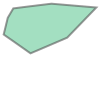

In [ ]:
around_public_library_trento.unary_union.convex_hull